In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers,regularizers
from IPython.display import Image, display
from tensorflow.keras.utils import plot_model

In [54]:
df=pd.read_csv("Concrete Compressive Strength.csv")

In [55]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [56]:
df.shape

(1030, 9)

In [57]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [58]:
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [59]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [60]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [61]:
df.drop_duplicates(inplace=True,keep='first')

Text(0.5, 1.0, 'Correlation Matrix')

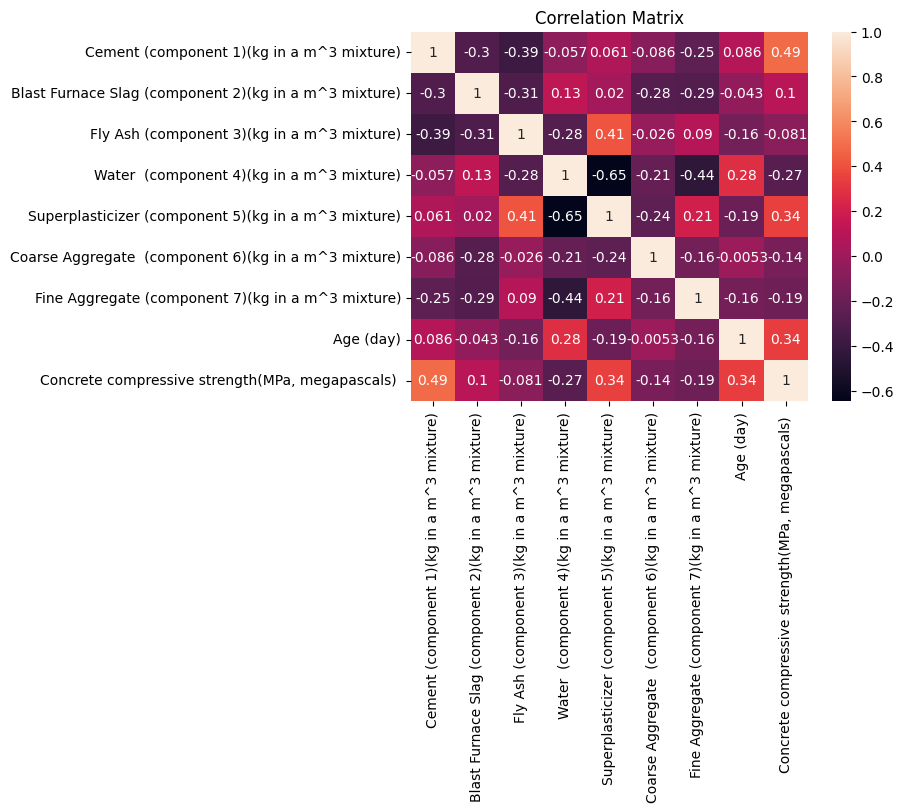

In [62]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")

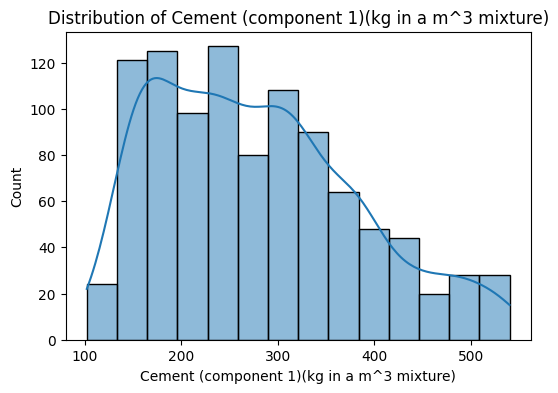

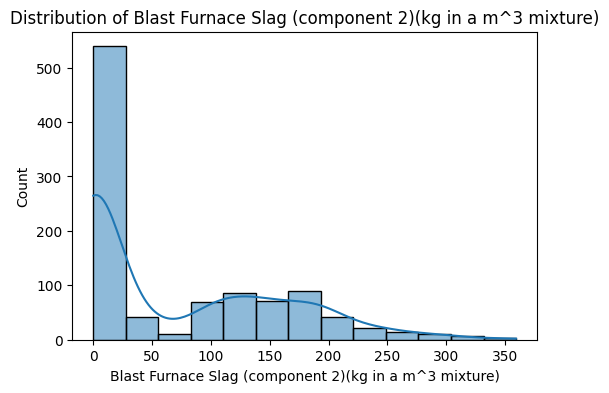

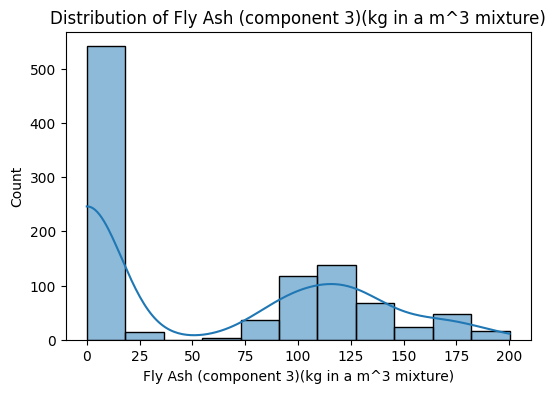

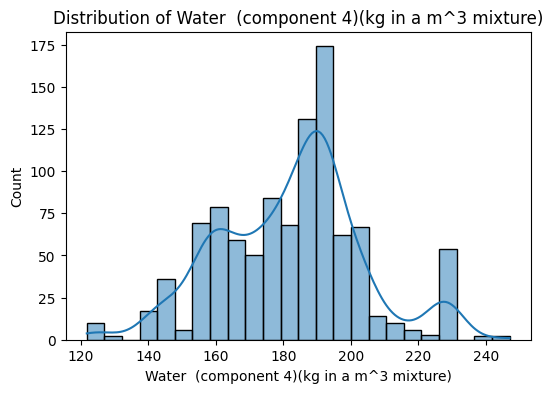

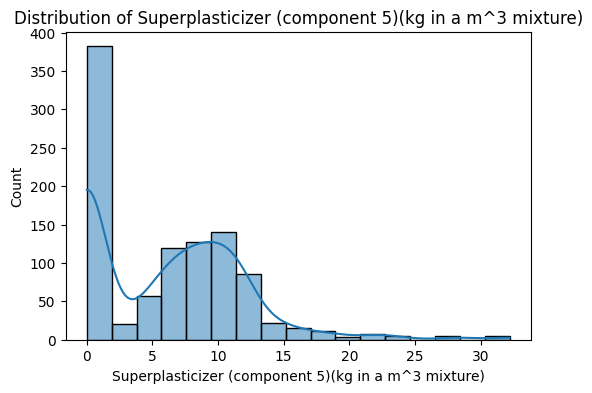

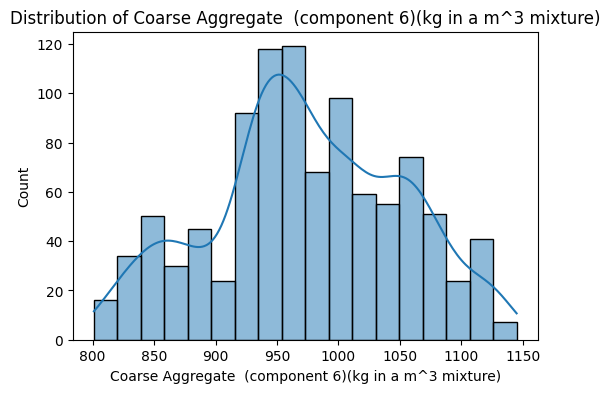

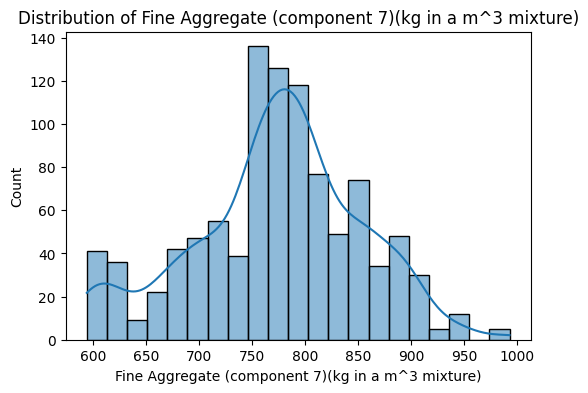

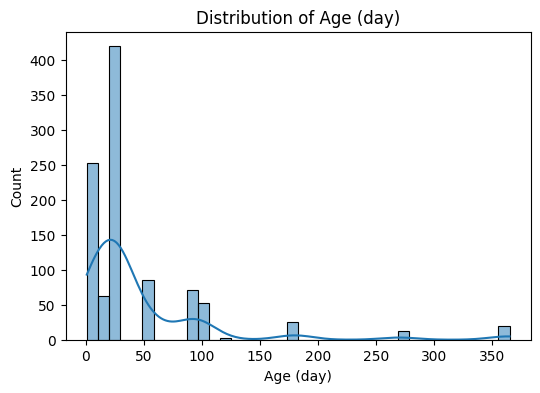

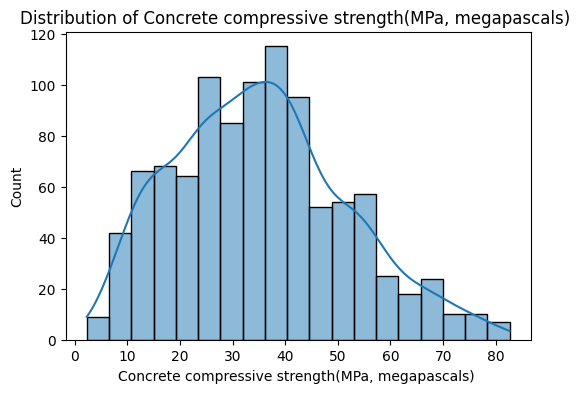

In [63]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

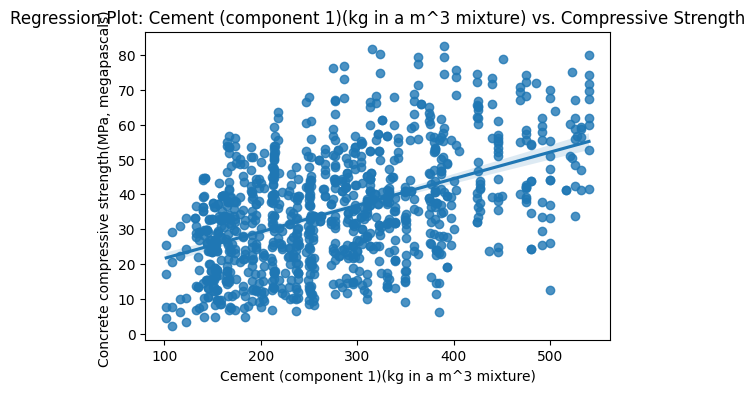

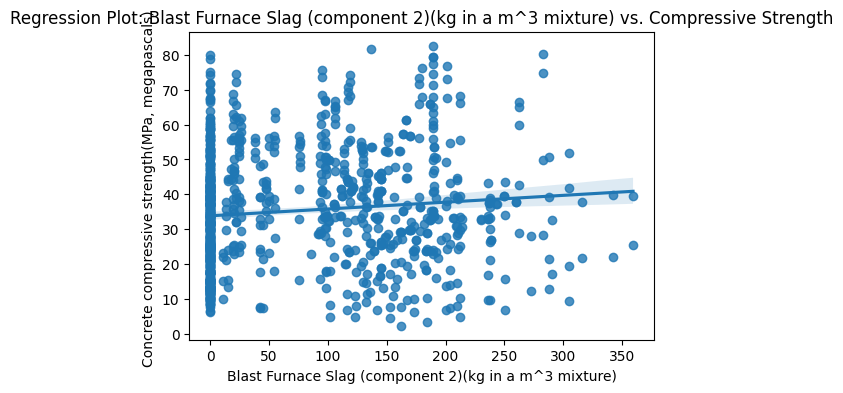

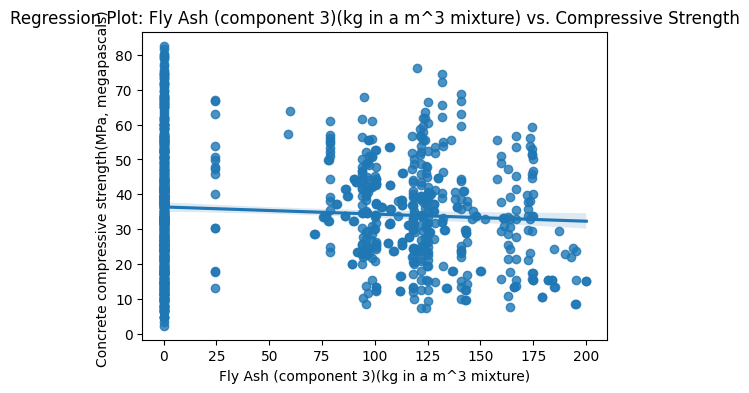

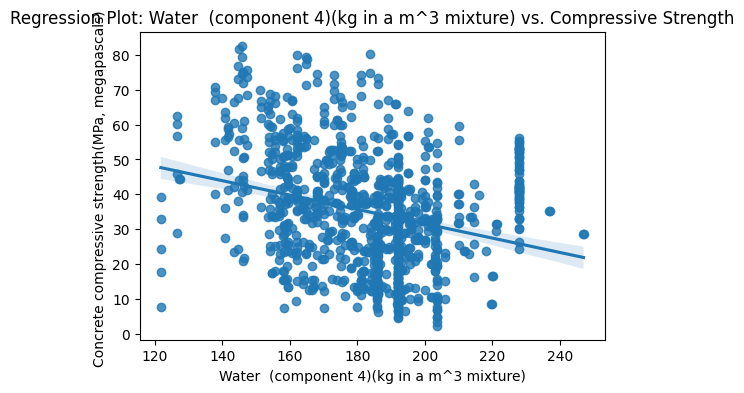

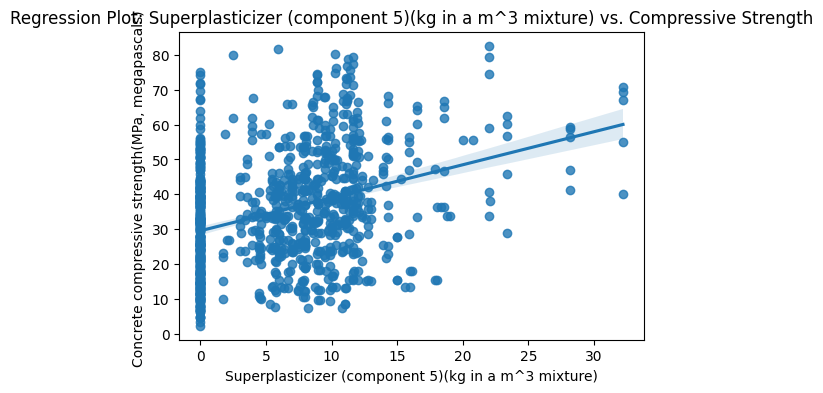

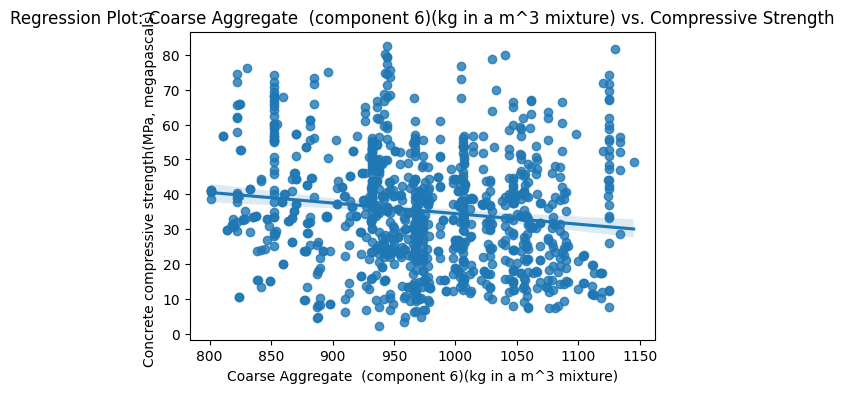

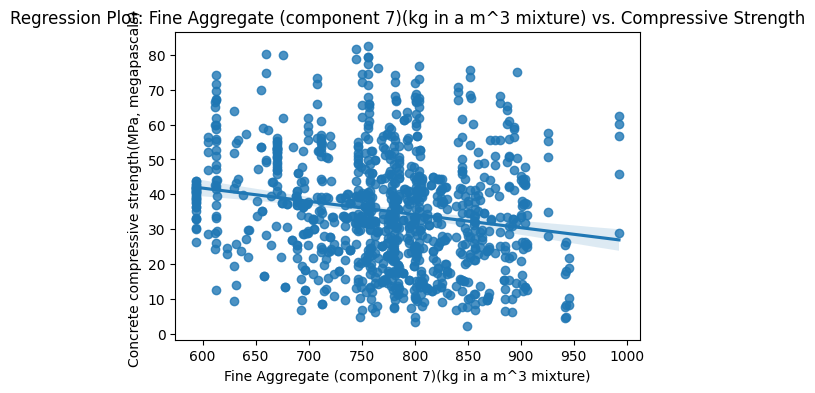

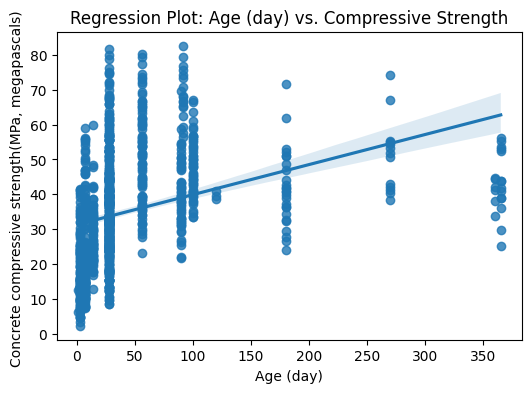

In [64]:
for component in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=component, y='Concrete compressive strength(MPa, megapascals) ', data=df)
    plt.title(f'Regression Plot: {component} vs. Compressive Strength')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


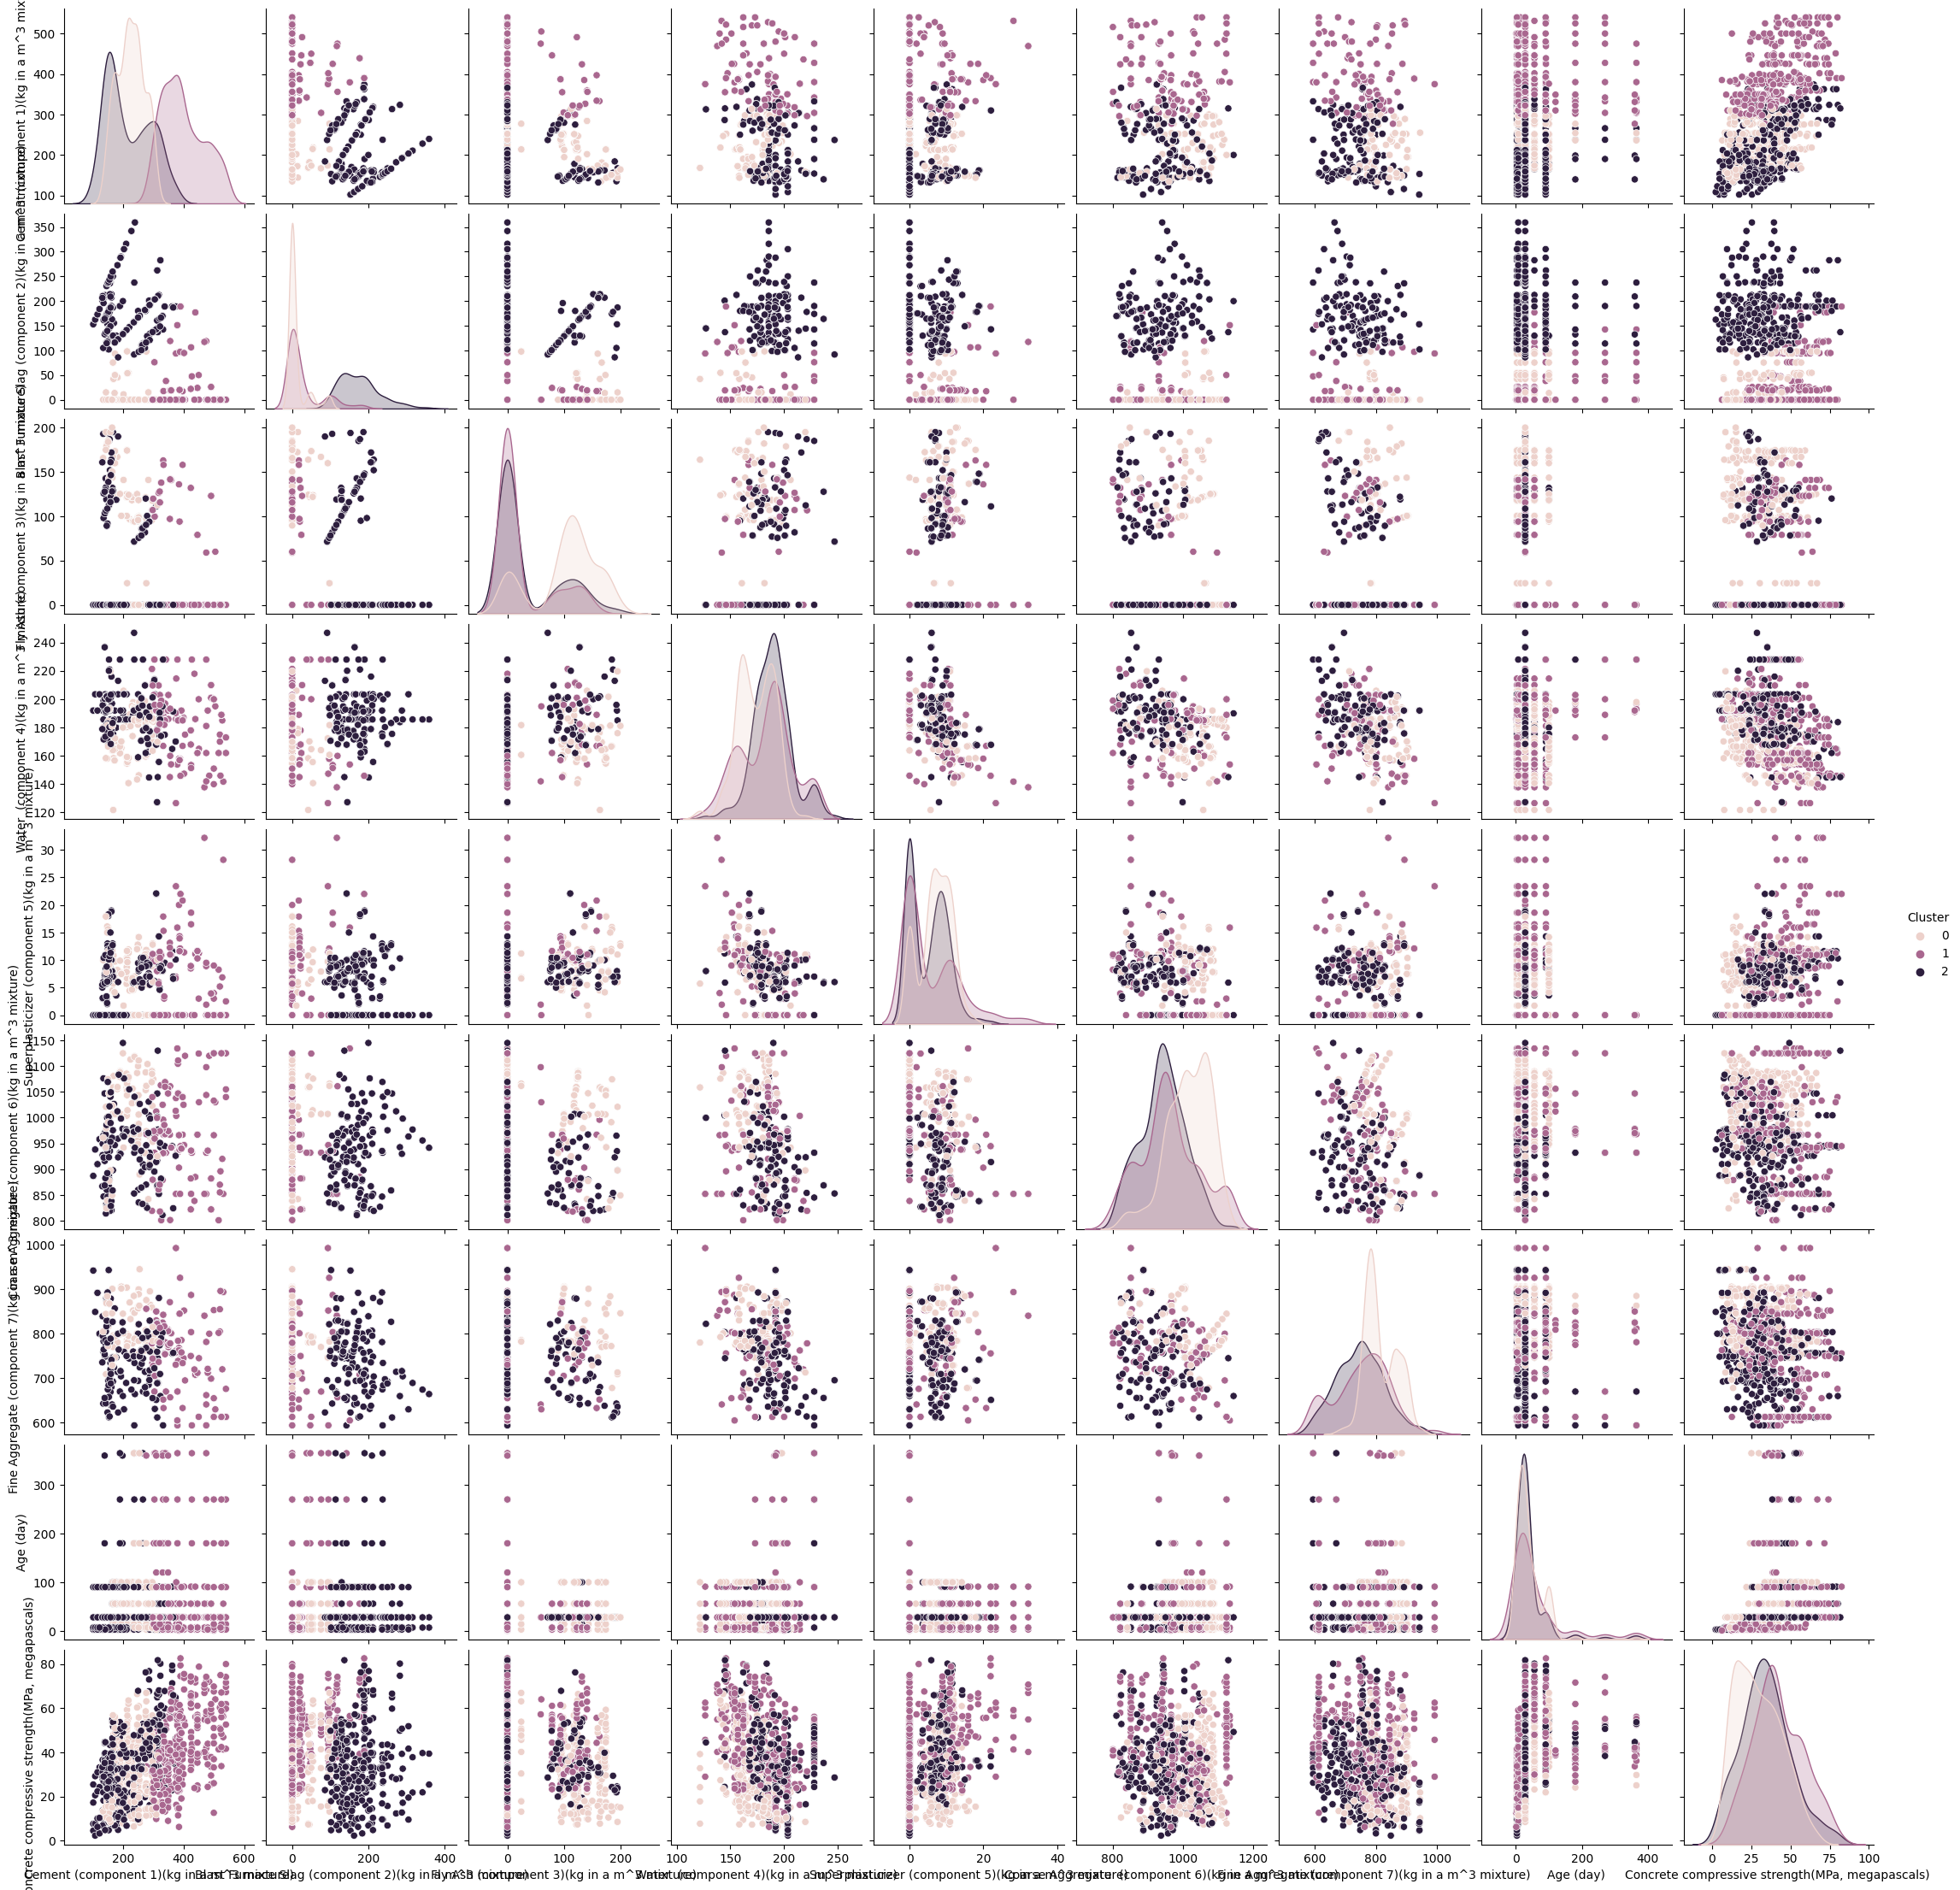

In [65]:
clustering_data = df[df.columns[:-1]]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(clustering_data)

sns.pairplot(df, diag_kind='kde', hue='Cluster')

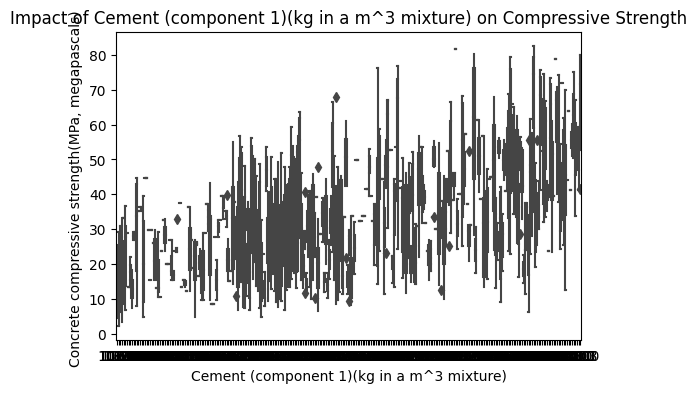

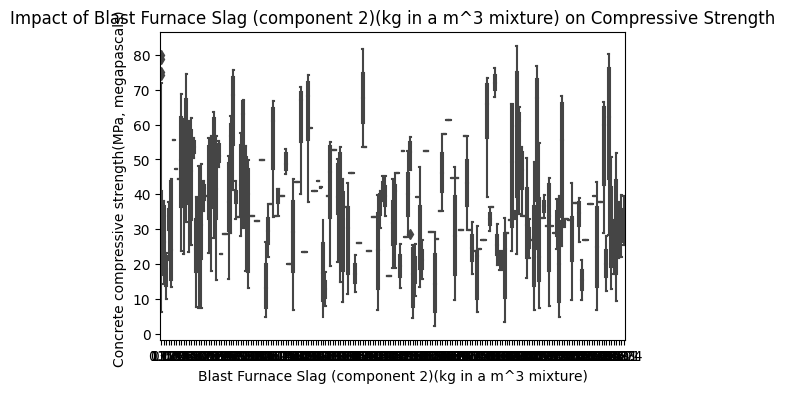

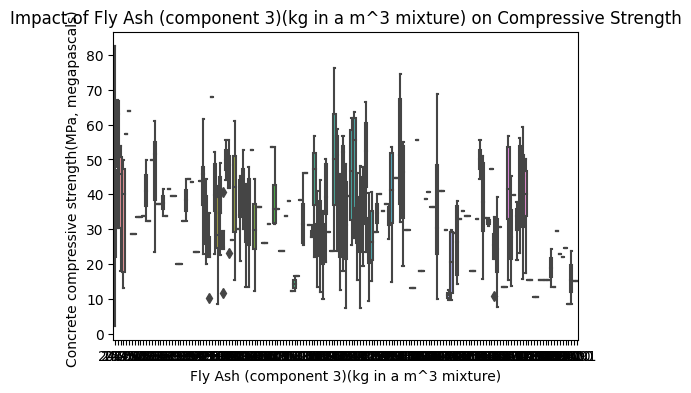

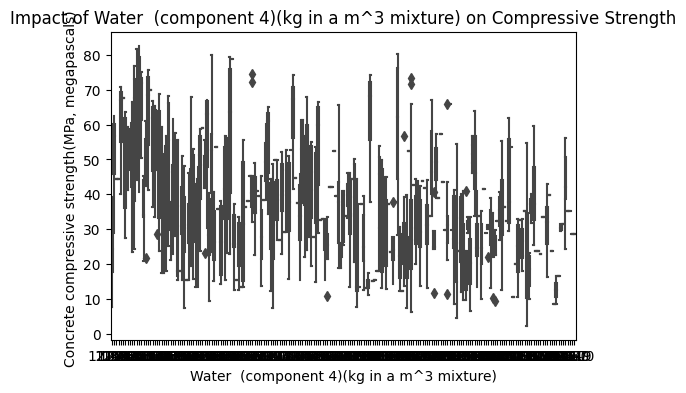

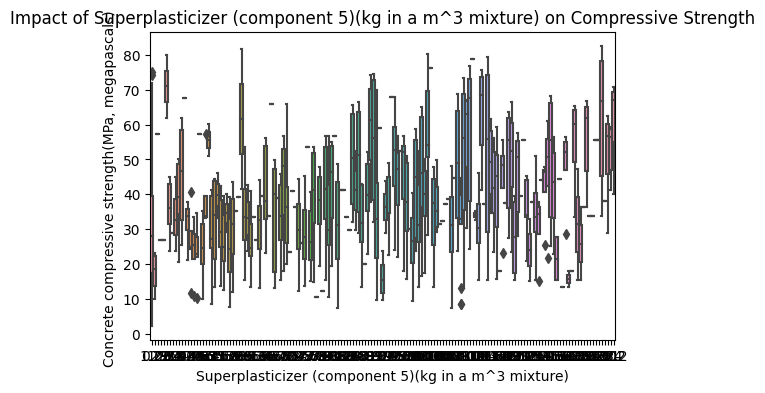

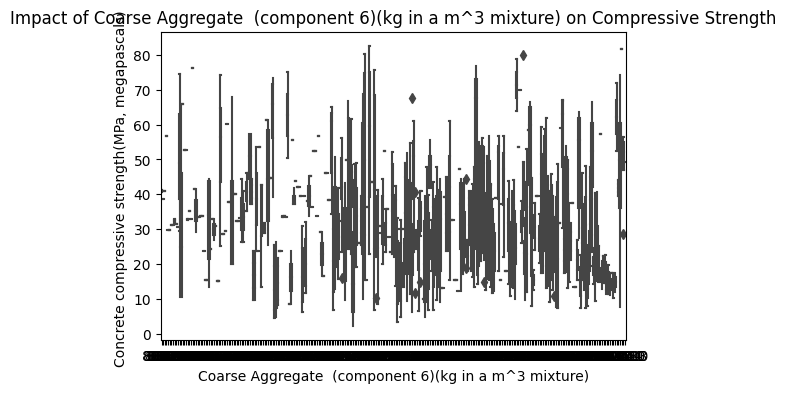

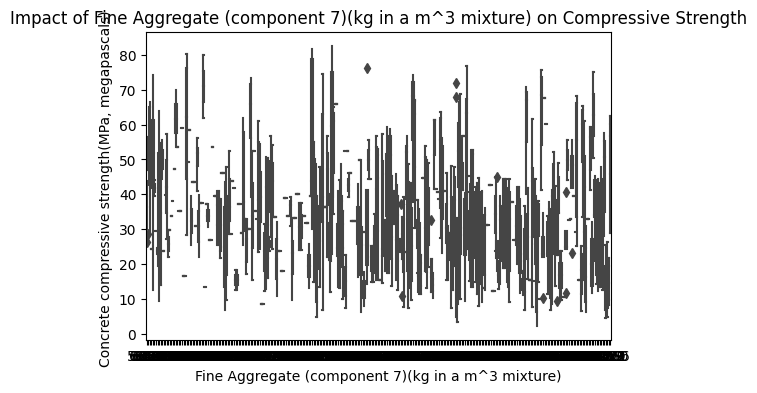

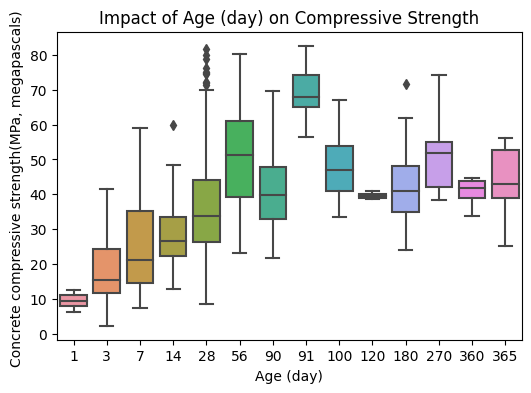

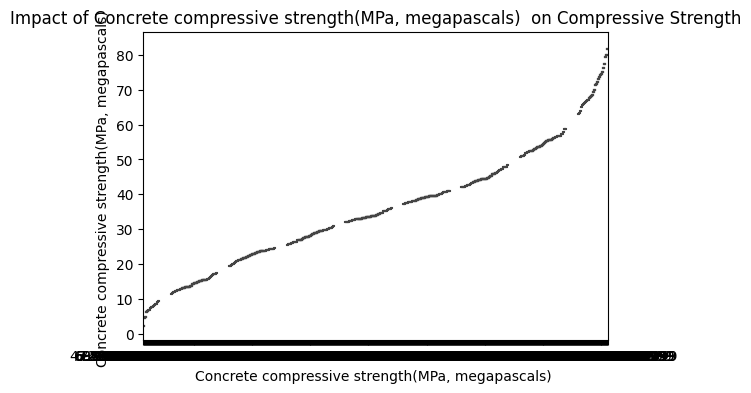

In [66]:
for component in df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=component, y='Concrete compressive strength(MPa, megapascals) ', data=df)
    plt.title(f'Impact of {component} on Compressive Strength')

In [67]:
x=df.drop(labels="Concrete compressive strength(MPa, megapascals) ",axis=1)
y=df["Concrete compressive strength(MPa, megapascals) "]

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [69]:
model = models.Sequential()
model.add(layers.BatchNormalization(input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [70]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test))

Epoch 1/100
804/804 [==============================] - 5s 4ms/step - loss: 1497.6978 - mae: 35.1042 - val_loss: 1396.1172 - val_mae: 33.6724
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 1447.2828 - mae: 34.3780 - val_loss: 1348.3920 - val_mae: 32.9561
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 1398.7426 - mae: 33.6588 - val_loss: 1302.0861 - val_mae: 32.2459
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 1351.3976 - mae: 32.9575 - val_loss: 1256.6248 - val_mae: 31.5384
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 1305.3102 - mae: 32.2458 - val_loss: 1212.8922 - val_mae: 30.8442
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 1260.7015 - mae: 31.5434 - val_loss: 1170.4019 - val_mae: 30.1542
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 1217.0359 - mae: 30.8588 - val_loss: 1128.7355 - val_mae: 29.4616
Epoch 8/100
8

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 256)               2560      
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                      

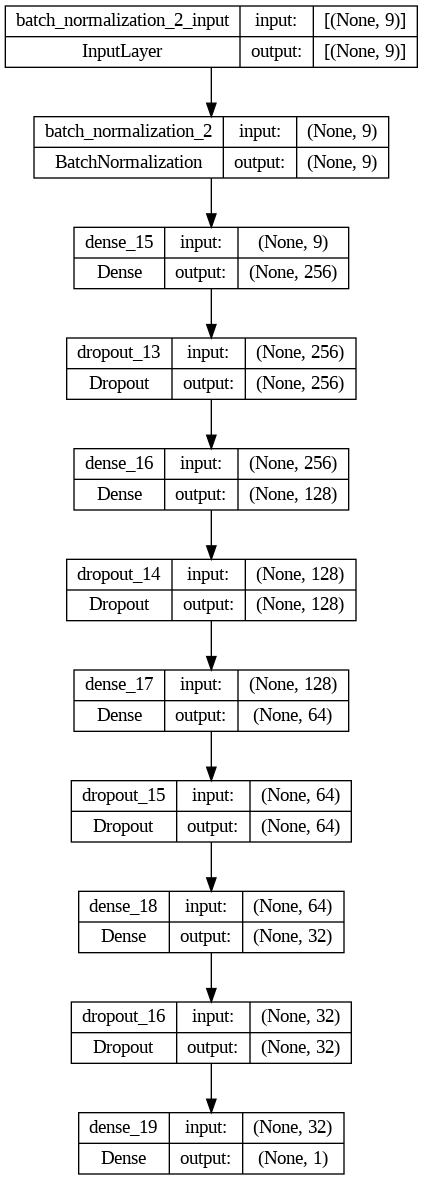

In [76]:
plot_model(model, show_shapes=True, to_file='model_architecture.png')
display(Image(filename='model_architecture.png'))

In [77]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 262.4688 - mae: 13.3241


[262.4687805175781, 13.324094772338867]

In [78]:
y_pred=model.predict(x_test)
print(y_pred)

7/7 [==============================] - 0s 2ms/step
[[34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 [34.82401]
 